<a href="https://colab.research.google.com/github/davlsb/data_analytics_2/blob/main/Python/Unit3/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.describe()

# Mean/median of all salaries

In [ ]:
# Mean of all salaries
df["salary"].mean()

113706.45843828715

In [ ]:
# Median of all salaries
df["salary"].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [ ]:
ndf = df.filter(items=["sex","salary"])

In [ ]:
ndf.groupby(["sex",]).median()

,salary
sex,
Female,103750
Male,108043


Finding the Median salary for all males

In [ ]:
m_df = ndf[df['sex']=='Male'].median().to_string()

In [ ]:
print("the median ", m_df)

the median  salary    108043.0


Finding the Median salary for all females

In [ ]:
f_df = ndf[df['sex']=='Female'].median().to_string()

In [ ]:
print("the median ", f_df)

the median  salary    103750.0


Comparing the Mean salary of Males and Females

In [ ]:
meanm_df = ndf[df['sex']=='Male'].mean()

In [ ]:
meanf_df = ndf[df['sex']=='Female'].mean()

In [ ]:
# The difference between mean salaries of male and female
meandif = float(meanf_df-meanm_df)
if(meandif < 0):
  meandif = meandif * -1
print("the difference is", meandif)

the difference is 14088.008738003162


# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [ ]:
servalary = df[['salary', 'yrs.service']]
servalary

there are  salary         397
yrs.service    397
dtype: int64 workers with over 20 years


In [ ]:
over20 = servalary[servalary['yrs.service'] >= 20]
over20count = over20[['salary']]
print("there are ", int(over20count.count()), "workers with over 20 years")
print("their mean salary is ",float(over20count.mean()))

there are  157 workers with over 20 years
their mean salary is  122520.65605095541


In [ ]:
over20

,salary,yrs.service
3,115000,39
4,141500,41
6,175000,23
7,147765,45
8,119250,20
...,...,...
384,125192,21
386,139219,27
388,119450,36
392,103106,30


Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [ ]:
under20 = servalary[servalary['yrs.service'] < 20]

In [ ]:
saldif = float(under20.mean()[['salary']] - over20.mean()[['salary']])
if (saldif < 0):
  saldif = saldif * -1
print("the difference is ", saldif)

the difference is  14580.151884288745


People who have salary of greater than or equal to 200,000

In [ ]:
g200k = df[df['salary'] >= 200000]
print(g200k)

     Unnamed: 0  rank discipline  yrs.since.phd  yrs.service   sex  salary
43           44  Prof          B             38           38  Male  231545
249         250  Prof          A             29            7  Male  204000
364         365  Prof          A             43           43  Male  205500


Conclusions:
There are 3 individuals with a salary above 200k. All 3 of them are males. Moreover, they are all professors. 


# Rename values, subset columns, etc

In [ ]:
df.columns = ['renamed1', 'renamed2','renamed3', 'renamed4','renamed5', 'renamed6', 'renamed7']

In [ ]:
ndf = pd.DataFrame({'Column1': ['test1', 'test2', 'test3'],
                   'Column2': ['abc', 'def', 'ghi']})
ndf

,Column1,Column2
0,test1,abc
1,test2,def
2,test3,ghi


# Create some simple visualizations showing some simple statistics

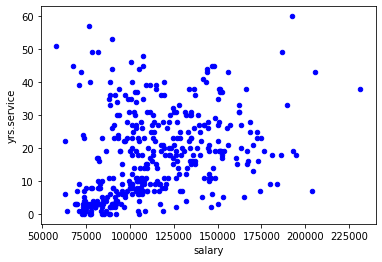

In [ ]:
df.plot(x='salary', y='yrs.service', color='blue', kind = 'scatter')

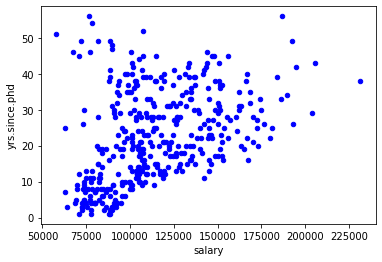

In [ ]:
df.plot(x='salary', y='yrs.since.phd', color='blue', kind = 'scatter')

Your observations from the visuals: 
* Years since phd matter more than years of service, as the high salaries don't always have lots of experince but always lots of years since phd.
* Some individuals with over 50 years of expericne stil make as much as those with none, but they're an exception.

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

* Females make less on average than males, with an average difference of 14088.
* Those with over 20 years of experience make around $14580 more than those with under 20 years.
* Those with a salry above 200k are all professors and male. 
* Years since PHD mattered more than years of service, as those with high salaries always had lots of years since phd.

